In [20]:
#importação de bibliotecas necessários do pyhton
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#importação do dataset 
file = pd.read_csv('partos-e-cesarianas.csv', sep=';', on_bad_lines='skip')
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Período                 5271 non-null   object 
 1   Região                  5271 non-null   object 
 2   Instituição             5271 non-null   object 
 3   Localização Geográfica  5271 non-null   object 
 4   Nº Total de Partos      5250 non-null   float64
 5   Nº Cesarianas           5250 non-null   float64
dtypes: float64(2), object(4)
memory usage: 247.2+ KB
None


In [22]:
#descrever o dataset
print (file.describe())

       Nº Total de Partos  Nº Cesarianas
count         5250.000000    5250.000000
mean           943.778286     275.840000
std            782.023730     223.061266
min              0.000000       0.000000
25%            344.000000     105.000000
50%            738.000000     218.000000
75%           1336.000000     391.000000
max           4949.000000    1426.000000


In [23]:
#listar as instituições totais em cada regiao

instituicoes_por_regiao = file.groupby("Região")["Instituição"].unique()
for regiao, instituicoes in instituicoes_por_regiao.items():
    print(f"Região: {regiao}")
    print(f"Total de instituições: {len(instituicoes)}")
    print("\n")




Região: Região de Saúde LVT
Total de instituições: 27


Região: Região de Saúde Norte
Total de instituições: 28


Região: Região de Saúde do Alentejo
Total de instituições: 6


Região: Região de Saúde do Algarve
Total de instituições: 2


Região: Região de Saúde do Centro
Total de instituições: 14




Número total de partos e cesarianas por região e ano:
                         Região   Ano  Nº Total de Partos  Nº Cesarianas
0           Região de Saúde LVT  2013            178835.0        52136.0
1           Região de Saúde LVT  2014            177713.0        47747.0
2           Região de Saúde LVT  2015            183294.0        48313.0
3           Região de Saúde LVT  2016            189136.0        49712.0
4           Região de Saúde LVT  2017            189270.0        49898.0
5           Região de Saúde LVT  2018            191661.0        52578.0
6           Região de Saúde LVT  2019            193305.0        54539.0
7           Região de Saúde LVT  2020            182650.0        53504.0
8           Região de Saúde LVT  2021            162548.0        47935.0
9           Região de Saúde LVT  2022            159821.0        50196.0
10          Região de Saúde LVT  2023            162445.0        51081.0
11          Região de Saúde LVT  2024             57020.0        18225

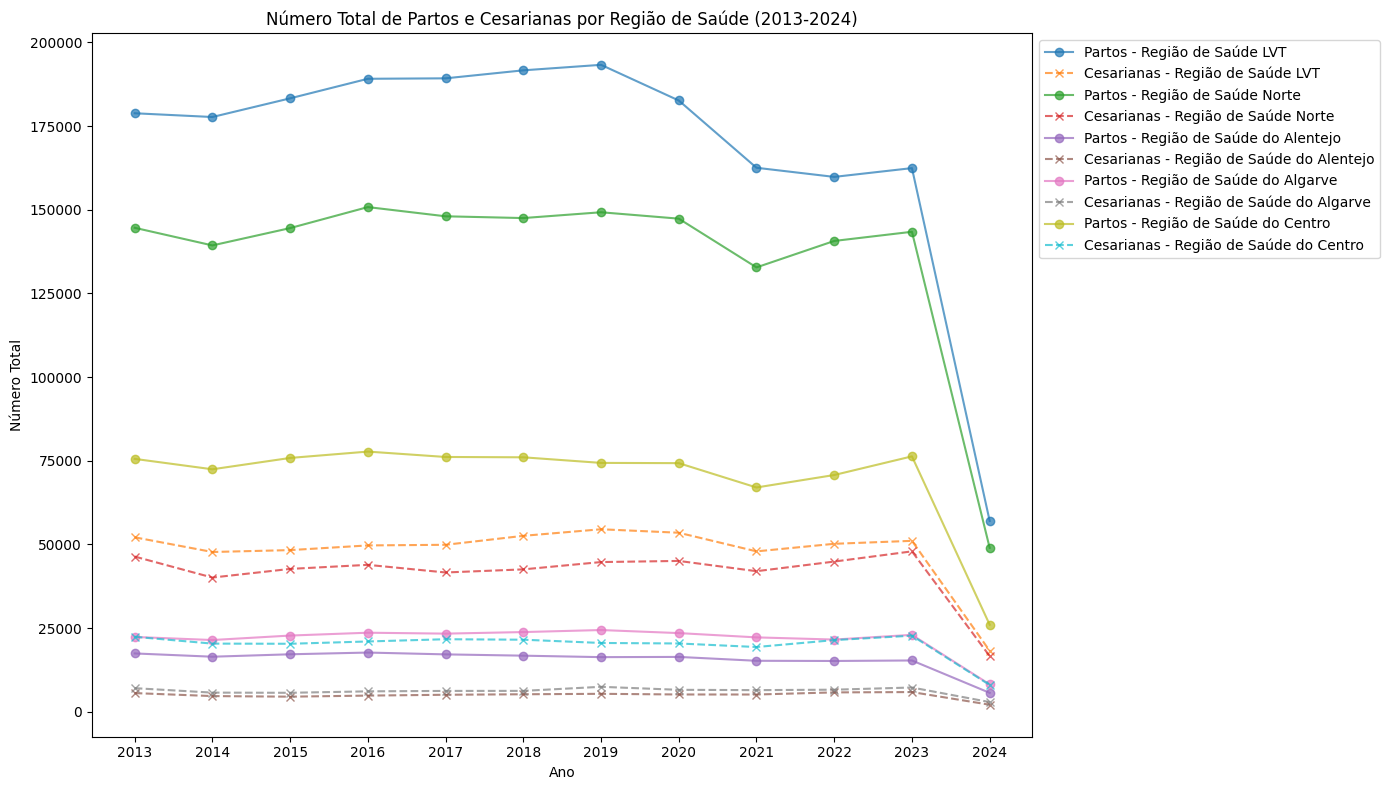

In [24]:


# Converter a coluna de Período para o tipo datetime
file['Período'] = pd.to_datetime(file['Período'], format='%Y-%m')

# Extrair o ano da coluna de Período
file['Ano'] = file['Período'].dt.year

# Filtrar os dados para os anos de 2013 a 2024
file_filtered = file[(file['Ano'] >= 2013) & (file['Ano'] <= 2024)]

# Agrupar por Região e Ano, somando o número de partos e cesarianas
resultados_por_regiao = file_filtered.groupby(['Região', 'Ano'])[['Nº Total de Partos', 'Nº Cesarianas']].sum().reset_index()

# Exibir os resultados
print("Número total de partos e cesarianas por região e ano:")
print(resultados_por_regiao)

# Criar o gráfico de linhas
plt.figure(figsize=(14, 8))

# Criar linhas para cada região
for regiao in resultados_por_regiao['Região'].unique():
    dados_regiao = resultados_por_regiao[resultados_por_regiao['Região'] == regiao]
    
    # Traçar linhas para partos
    plt.plot(dados_regiao['Ano'], dados_regiao['Nº Total de Partos'], marker='o', label=f"Partos - {regiao}", alpha=0.7)
    
    # Traçar linhas para cesarianas
    plt.plot(dados_regiao['Ano'], dados_regiao['Nº Cesarianas'], marker='x', linestyle='--', label=f"Cesarianas - {regiao}", alpha=0.7)

# Adicionar rótulos e título
plt.xlabel("Ano")
plt.ylabel("Número Total")
plt.title("Número Total de Partos e Cesarianas por Região de Saúde (2013-2024)")
plt.xticks(range(2013, 2025))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.tight_layout()
plt.show()  # Exibe o gráfico no console

